In [22]:
import pandas as pd

# Load the cleaned dataset from the previous step
df = pd.read_csv("../df_cleaned_feature.csv")

# Check shape to verify data is loaded correctly
print("Dataset Shape:", df.shape)

# Create a copy to work with
df_cleaned_copy = df.copy() 

Dataset Shape: (1354, 27)


In [23]:
df_original = pd.read_csv("../cleaned_data.csv")

In [24]:
df_cleaned_copy['SalePrice'] = df_original['SalePrice']
df_cleaned_copy.columns

Index(['2ndFlrSF', 'WoodDeckSF', 'HalfBath', 'OpenPorchSF', 'LotFrontage',
       'BsmtFinSF1', 'Fireplaces', 'MasVnrArea', 'TotRmsAbvGrd', 'FullBath',
       'TotalBsmtSF', 'OverallQual', 'SaleCondition_Partial',
       'BsmtFinType1_GLQ', 'GarageType_Attchd', 'Neighborhood_NridgHt',
       'GarageFinish_Unf', 'KitchenQual_TA', 'Exterior2nd_VinylSd',
       'BsmtExposure_Gd', 'FireplaceQu_Gd', 'BsmtQual_TA', 'Foundation_CBlock',
       'GarageType_Detchd', 'HeatingQC_TA', 'ExterQual_Gd', 'KitchenQual_Gd',
       'SalePrice'],
      dtype='object')

In [25]:
df_cleaned_copy.to_csv('../df_cleaned_updated.csv', index = False)

In [26]:
#splitting dataset to training and testing sets
from sklearn.model_selection import train_test_split

#Define features(X) and target variable(y)
X = df_cleaned_copy.drop(columns = ['SalePrice'])
y = df_cleaned_copy['SalePrice']

#Split 80% data to train and 20% to test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#Check shape of train and test sets
X_train.shape, X_test.shape

((1083, 27), (271, 27))

In [27]:
from sklearn.linear_model import LinearRegression

#Initialize Linear Regression model
lr_model= LinearRegression()

#Train the model using the training data
lr_model.fit(X_train, y_train)

#Get model coefficients and intercept
print(f'Intercept: {lr_model.intercept_}')
print(f'Coefficient: {lr_model.coef_}')

Intercept: -111749.91532874497
Coefficient: [   25.53908254    42.40225795  2929.4188056     39.19390605
   340.31566774    27.19884564  6944.39577123    45.59866102
  3649.13783221  9925.61855739    43.23261497 24258.57213382
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.        ]


In [28]:
#Predict house prices on test data
y_pred = lr_model.predict(X_test)

#Displaying the first 10 predictions
y_pred[:10]

array([ 97732.10290419, 147629.21747592, 209742.84253347, 122042.36850498,
        99591.25643553, 419829.0443965 ,  69659.95802405, 190569.91352984,
       152099.63144421, 202450.40398234])

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-Squared (R2): {r2}')

Mean Absolute Error (MAE): 23088.13287383957
Mean Squared Error (MSE): 1031055961.5129586
Root Mean Squared Error (RMSE): 32110.060129388712
R-Squared (R2): 0.8032041262867126


In [30]:
#Get feature names
feature_names = X_train.columns

#Get absolute coefficients
feature_importance = abs(lr_model.coef_)

#Creating a dataframe for visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

#Sorting in descending by importance
importance_df = importance_df.sort_values(by = 'Importance', ascending = False)
importance_df

,Feature,Importance
11,OverallQual,24258.572134
9,FullBath,9925.618557
6,Fireplaces,6944.395771
8,TotRmsAbvGrd,3649.137832
2,HalfBath,2929.418806
4,LotFrontage,340.315668
7,MasVnrArea,45.598661
10,TotalBsmtSF,43.232615
1,WoodDeckSF,42.402258
3,OpenPorchSF,39.193906


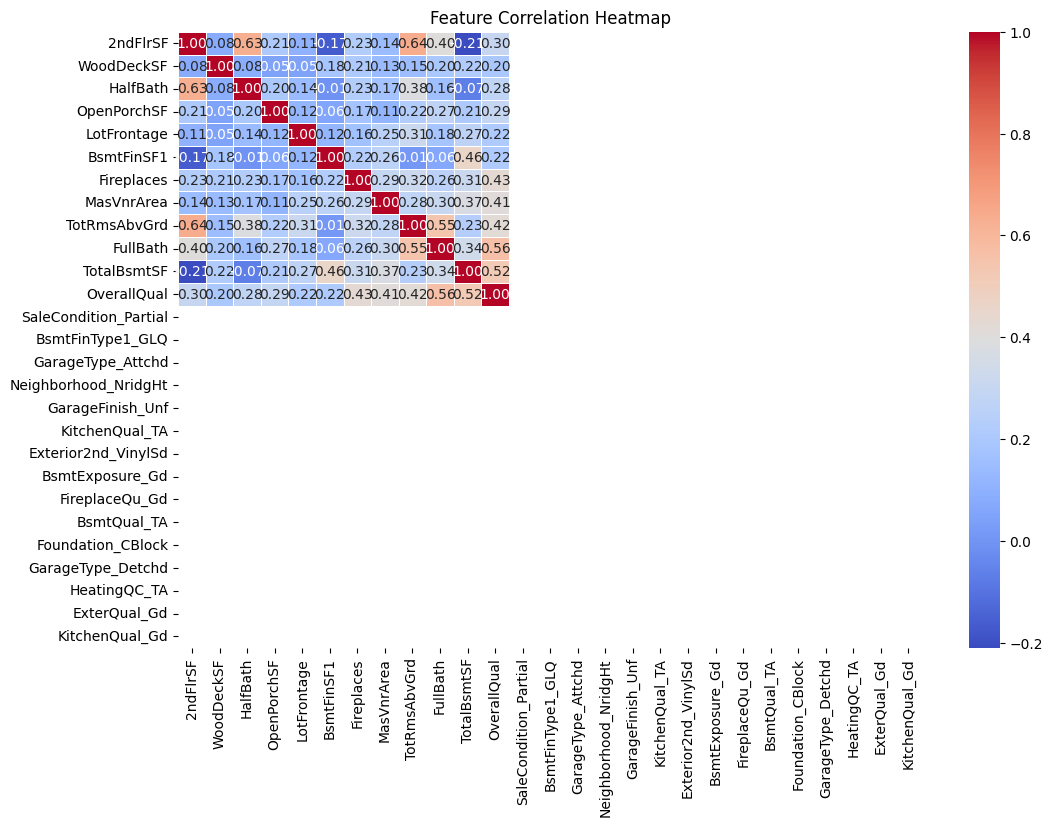

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

#Compute correlation matrix for numerical features
corr_matrix = X_train.corr()

#plot heatmap
plt.figure(figsize = (12, 8))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', fmt = ".2f", linewidths = 0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [32]:
# Dropping only 'HalfBath' and keeping the others
X_train_selected = X_train.drop(['HalfBath'], axis=1)
X_test_selected = X_test.drop(['HalfBath'], axis=1)

print(f'New X_train shape: {X_train_selected.shape}')
print(f'New X_test shape: {X_test_selected.shape}')

New X_train shape: (1083, 26)
New X_test shape: (271, 26)


In [33]:
# Training the model again with selected features
lr_model_selected = LinearRegression()
lr_model_selected.fit(X_train_selected, y_train)

# Predicting on test data
y_pred_selected = lr_model_selected.predict(X_test_selected)

# Evaluating the model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae_selected = mean_absolute_error(y_test, y_pred_selected)
mse_selected = mean_squared_error(y_test, y_pred_selected)
rmse_selected = mse_selected ** 0.5
r2_selected = r2_score(y_test, y_pred_selected)

print(f'MAE: {mae_selected:.2f}')
print(f'MSE: {mse_selected:.2f}')
print(f'RMSE: {rmse_selected:.2f}')
print(f'R² Score: {r2_selected:.4f}')

MAE: 23231.73
MSE: 1042280834.21
RMSE: 32284.37
R² Score: 0.8011


In [34]:
#Feature imporatnce using model coefficient

#Get feature names
feature_names = X_train_selected.columns

#Get coefficients from the traind model
coefficients = lr_model_selected.coef_

#Creating the Dataframe for better visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

#Sorting features by absolute coefficient values
feature_importance_df['Abs_Coefficient'] = feature_importance_df['Coefficient'].abs()
feature_importance_df = feature_importance_df.sort_values(by = 'Abs_Coefficient', ascending = False)

print(feature_importance_df[['Feature', 'Coefficient']])

                  Feature   Coefficient
10            OverallQual  24401.469926
8                FullBath   9305.150612
5              Fireplaces   7023.454803
7            TotRmsAbvGrd   3608.042367
3             LotFrontage    346.265309
6              MasVnrArea     45.999576
9             TotalBsmtSF     43.267532
1              WoodDeckSF     42.703708
2             OpenPorchSF     40.596338
0                2ndFlrSF     27.821593
4              BsmtFinSF1     27.374397
11  SaleCondition_Partial      0.000000
12       BsmtFinType1_GLQ      0.000000
13      GarageType_Attchd      0.000000
14   Neighborhood_NridgHt      0.000000
15       GarageFinish_Unf      0.000000
16         KitchenQual_TA      0.000000
17    Exterior2nd_VinylSd      0.000000
18        BsmtExposure_Gd      0.000000
19         FireplaceQu_Gd      0.000000
20            BsmtQual_TA      0.000000
21      Foundation_CBlock      0.000000
22      GarageType_Detchd      0.000000
23           HeatingQC_TA      0.000000


In [35]:
#Validating with permutation importance which measures how a feature contributes by shuffling its values and checking the model accuracy

from sklearn.inspection import permutation_importance

#Calculating the permutation importance
perm_importance = permutation_importance(lr_model_selected, X_test_selected, y_test, scoring = 'r2')

#Converting into dataframe
perm_importance_df = pd.DataFrame({'Feature': X_test_selected.columns, 'Importance': perm_importance.importances_mean})

#Sorting by importance
perm_importance_df = perm_importance_df.sort_values(by = 'Importance', ascending = False)

print(perm_importance_df)

                  Feature  Importance
10            OverallQual    0.351126
9             TotalBsmtSF    0.110027
4              BsmtFinSF1    0.050302
0                2ndFlrSF    0.029881
6              MasVnrArea    0.010359
1              WoodDeckSF    0.008122
5              Fireplaces    0.006259
7            TotRmsAbvGrd    0.006200
8                FullBath    0.003732
2             OpenPorchSF    0.003525
3             LotFrontage    0.003018
11  SaleCondition_Partial    0.000000
12       BsmtFinType1_GLQ    0.000000
13      GarageType_Attchd    0.000000
14   Neighborhood_NridgHt    0.000000
15       GarageFinish_Unf    0.000000
16         KitchenQual_TA    0.000000
17    Exterior2nd_VinylSd    0.000000
18        BsmtExposure_Gd    0.000000
19         FireplaceQu_Gd    0.000000
20            BsmtQual_TA    0.000000
21      Foundation_CBlock    0.000000
22      GarageType_Detchd    0.000000
23           HeatingQC_TA    0.000000
24           ExterQual_Gd    0.000000
25         K

In [36]:
#Dropping the features that have zero importance

features_to_drop = [
    'SaleCondition_Partial', 'BsmtFinType1_GLQ', 'GarageType_Attchd', 'Neighborhood_NridgHt',
    'GarageFinish_Unf', 'KitchenQual_TA', 'Exterior2nd_VinylSd', 'BsmtExposure_Gd',
    'FireplaceQu_Gd', 'BsmtQual_TA', 'Foundation_CBlock', 'GarageType_Detchd',
    'HeatingQC_TA', 'ExterQual_Gd', 'KitchenQual_Gd'
]

X_train_optimized = X_train_selected.drop(columns = features_to_drop)
X_test_optimized = X_test_selected.drop(columns = features_to_drop)

print(f'Optimized X_train shape: {X_train_optimized.shape}')
print(f'Optimized X_test shape: {X_test_optimized.shape}')

Optimized X_train shape: (1083, 11)
Optimized X_test shape: (271, 11)


In [37]:
#After removing the features retaining the model to check of the performance improved

#Training the model again
lr_model_optimized = LinearRegression()
lr_model_optimized.fit(X_train_optimized, y_train)

#Predicting again
y_pred_optimized = lr_model_optimized.predict(X_test_optimized)

#Evaluating again
mae_optimized = mean_absolute_error(y_test, y_pred_optimized)
mse_optimized = mean_squared_error(y_test, y_pred_optimized)
rmse_optimized = mse_optimized ** 0.5
r2_optimized = r2_score(y_test, y_pred_optimized)

print(f'Optimized MAE: {mae_optimized:.2f}')
print(f'Optimized MSE: {mse_optimized:.2f}')
print(f'Optimized RMSE: {rmse_optimized:.2f}')
print(f'Optimized R² Score: {r2_optimized:.4f}')

Optimized MAE: 23231.73
Optimized MSE: 1042280834.21
Optimized RMSE: 32284.37
Optimized R² Score: 0.8011


# Model Deployment
Saving the trained model

In [38]:
import joblib

# Save the optimized model
joblib.dump(lr_model_optimized, 'house_price_model.pkl')

print("Model saved successfully!")

Model saved successfully!


In [39]:
import joblib
import pandas as pd

# Load the saved model
loaded_model = joblib.load('house_price_model.pkl')

# Ensure correct feature names & order
expected_features = X_train_optimized.columns

# Define new data based on expected feature order
new_data_values = [
    [7, 856, 706, 854, 0, 192, 1, 65.0, 7, 84, 2],  # First house
    [5, 1262, 0, 0, 108, 0, 0, 80.0, 5, 0, 1]       # Second house
]

# Create a DataFrame with correct feature names and order
new_data = pd.DataFrame(new_data_values, columns=expected_features)

# Predict house prices
predicted_prices = loaded_model.predict(new_data)

# Add predictions to the dataframe
new_data['Predicted_SalePrice'] = predicted_prices

# Display properly formatted output
print(new_data.to_string(index=False))

 2ndFlrSF  WoodDeckSF  OpenPorchSF  LotFrontage  BsmtFinSF1  Fireplaces  MasVnrArea  TotRmsAbvGrd  FullBath  TotalBsmtSF  OverallQual  Predicted_SalePrice
        7         856          706          854           0         192           1          65.0         7           84            2         1.949961e+06
        5        1262            0            0         108           0           0          80.0         5            0            1         3.047532e+05
